<a href="https://colab.research.google.com/github/miramirezg/pra/blob/master/Informe_2_Nevados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Evaluación de la dinámica temporal del contenido de nieve de los glaciares de Colón, Cocuy y Ruíz empleando imágenes satelitales Landsat en la plataforma GEE**

Realizado por: **Miguel Ángel Ramírez**

Estudiante de **Maestría en Geomática**, Universidad Nacional de Colombia

# 1. Introducción

El empleo de imágenes satelitales para monitoreo de la tierra y las fotografías aéreas han sido empleados históricamente para la estudio, delimitación y análisis de coberturas de la tierra (Hansen & Loveland, 2012) junto a monitoreo de los fenómenos relacionados con el cambio climático (Friedl, Weiser, Fluhrer, & Braun, 2019). Con el desarrollo de las ciencias de la computación se han investigado y aplicado métodos para el análisis masivo multitemporal de imágenes satelitales a partir de la información espectral que poseen (Svendsen, Martino, & Camps-valls, 2019).

Uno de los principales análisis derivado del uso de imágenes satelitales ha sido el estudio del cambio de cobertura de los nevados o glaciares (Berman et al., 2018; Satir, 2016), debido a que estos cambios están directamente relacionados con el cambio climático que ha presentado el planeta tierra (Friedl et al., 2019). A partir del objetivo anterior se han realizado múltiples estudios entre los que se destacan el empleo de imágenes MODIS y Landsat para el análisis diario de la cobertura de nevados en Yellowhead, Canada (Berman et al., 2018) y por otro lado la delimitación multitemporal de los nevados de Cilo, Turquia aplicando clasificación orientada a objetos (Satir, 2016).

El objetivo del informe es evaluar la cantidad de nieve de los nevados de Colón, Cocuy y Ruíz a través del tiempo empleando el índice normalizado de Nieve (NDSI) a partir de las imágenes Landsat disponibles en *Google Earth Engine*. El procedimiento expuesto en este documento muestra de forma detallada todos los procesos para la obtención y análisis de la información multitemporal del contenido de nieve de los glaciares pertenecientes a los parques nacionales naturales de la Sierra Nevada de Santa Marta, El Cocuy y los Nevados. La importancia radica porque el monitoreo y conservación de estos glaciares es crucial para el aseguramiento del recurso hídrico en las regiones aledañas, además del valor cultural que poseen estos picos para comunidades indígenas como de las comunidades indígenas arhuacos (o ikas), los wiwas, los kogis y los kankuamos en la Sierra Nevada de Santa Marta. Esto es congruente con los objetivos de desarrollo sostenible de la agenda 2030 relacionados con hambre cero y la vida en ecosistemas terrestres.



# 2. Metodología

## 2.1. Zona de Estudio

Puesto que el análisis fue realizado en tres áreas de interés a continuación se muestra cada una:

- El parque Natural Nacional (PNN) Sierra Nevada de Santa Marta se encuentra ubicado en la zona norte de Colombia, específicamente entre los departamentos de Magdalena, Guajira y Cesar. Corresponde a un macizo montañoso que se eleva abruptamente desde las costas del Mar Caribe hasta alcanzar una altura de 5.775 metros en sus picos nevados Bolívar y Colón; ubicados a tan sólo 42 kilómetros del mar. Por sus condiciones topográficas especiales, es lugar de nacimiento de los drenajes más importantes de la región, es decir provee de agua potable a gran parte de la región Caribe. Se visualiza en el siguiente visor en las coordenadas longitud: -73.71068408862976, latitud: 10.842581182426391 la ubicación del Pico Colón en el PNN:


In [0]:
import folium

m = folium.Map(
    location=[10.84, -73.71],
    zoom_start=11
)
tooltip = 'Información aqui!'
folium.Marker([10.842581182426391, -73.71068408862976, ], popup='<i>Pico Cristobal Colon</i>', tooltip=tooltip).add_to(m)
m

- El Parque Natural Nacional del Cocuy posee la mayor masa glaciar de Colombia conformada por más de 25 picos cubiertos de hielo y nieve, en dos cadenas montañosas de aproximadamente 25 kilómetros de longitud por 4 de ancho. Se encuentra ubicado en el norte de los departamentos de Boyacá y Arauca. La sucesión de picos nevados del Parque (de 4.800 a 5.330 msnm) inicia con Campanillas Blanco y continúa con el Pan de Azúcar, Púlpito del Diablo, Cóncavos, Ritakuwas y Güicán, entre otros, formando una fila que llega hasta la laguna Grande de los Verdes. El área protegida también tiene páramos y una gran franja de bosque andino y selva basal que albergan gran diversidad de especies de fauna y flora. La ubicación del Nevado de Cocuy se visualiza en el siguiente visor en las coordenadas longitud: -72.28583304688681, latitud: 6.458040063083138

In [0]:
m = folium.Map(
    location=[6.45, -72.28],
    zoom_start=10
)

tooltip = 'Información aqui!'
folium.Marker([6.458040063083138, -72.28583304688681, ], popup='<i>Nevado El Cocuy</i>', tooltip=tooltip).add_to(m)
m


- El Parque Nacional Natural Los Nevados se localiza en el Eje Cafetero, en el complejo volcánico norte conformado por el Nevado del Ruíz, Nevado de Santa Isabel y Nevado del Tolima, y los Paramillos del Cisne, Santa Rosa y Quindío. El Área Protegida es el corazón de la región cafetera colombiana. Los ríos que descienden de sus picos nevados y sus páramos, riegan las tierras agrícolas y nutren los acueductos de las ciudades, pueblos y veredas del centro del País. El Nevado del Ruíz dentro del PNN se ubica en las coordenadas longitud: -75.32295673697962, latitud: 4.894131887593361

In [0]:
m = folium.Map(
    location=[4.89, -75.31],
    zoom_start=12
)
, 
tooltip = 'Información aqui!'
folium.Marker([4.894131887593361, -75.32295673697962], popup='<i>Nevado del Ruíz</i>', tooltip=tooltip).add_to(m)
m

## 2.2. Datos

Para el estudio fueron empleadas las siguientes imágenes satelitales disponibles en la colección de *Google Earth Engine*:

Misión Satelital | Resolución Espacial (m) | Fecha | Nivel de Procesamiento | Cantidad de imágenes
--- | --- |--- | --- | ---
Landsat 4 | 30 | Agosto 22 de 1982 - Diciembre 14 de 1993 |  Collection 1 Tier 1 Surface Reflectance | 41
Landsat 5 | 30 | Enero 1 de 1984 - Mayo 5 de 2012 |  Collection 1 Tier 1 Surface Reflectance | 244
Landsat 7 | 30 | Enero 1 de 1999 -  |  Collection 1 Tier 1 Surface Reflectance | 853
Landsat 8 | 30 | Abril 11 de 2013 -  |  Collection 1 Tier 1 Surface Reflectance | 102

## 2.3 Métodos

Se aplicaron los métodos mostrados en la siguiente imagen:

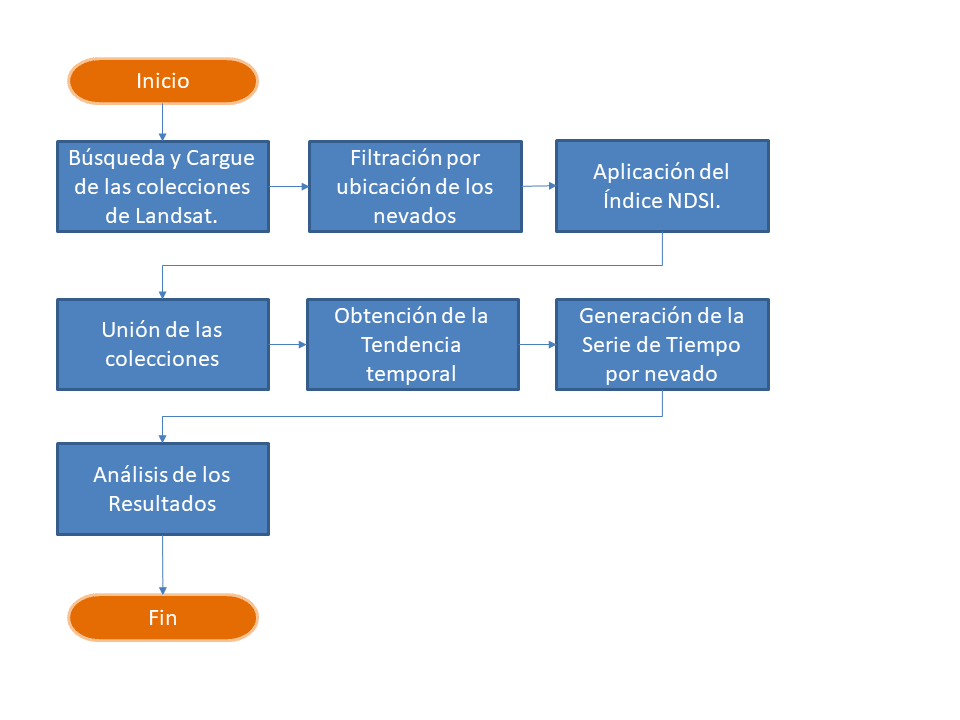

In [0]:
Image('Flujograma.png', width= 900)


El primer paso corresponde a la preparación del código y el cargue de las *ImageCollection* de las misiones Landsat disponibles en el nivel de procesamiento *Tier 1 Surface Reflectance*, lo cual asegura que cada imagen posee corrección atmosférica y geométrica con valores en reflectancia de superficie. Cada colección fue cargada con la condición de que estuvieran ubicados en los nevados y con un porcentaje de nubosidad inferior a 40%, no fueron aplicadas máscaras porque dentro de la banda de calidad de cada imagen clasifica como nube a los nevados. Con cada cargue fue calculado el índice normalizado de nieve (NDSI), el cual es plenamente utilizado en los estudios de monitoreo de cantidad de nieve y se puede asociar como un indicador de la cantidad de nieve (Berman et al., 2018). El índice se calcula:

> $NDSI = \frac{Reflectancia-Verde - Reflectancia-SWIR1}{Reflectancia-Verde + Reflectancia-SWIR1}$

Para el análisis temporal del NDSI fueron empleados dos métodos. El primero que correspondio a utilizar los métodos propios de *Google Earth Engine*  y el segundo utilizando la librería de *Python* desarollada por *Facebook* denominada *fbprophet*, que emplea modelos aditivos para la estimación del modelo. Para los dos casos se obtuvó la tendencia temporal de cada nevado de acuerdo a las fechas disponibles y se estimó la serie temporal asociada a cada localización (tomando el valor reportado por el píxel que contiene la coordenada de cada nevado), adicionalmente con la librería *fbprophet* se realizo estimaciones para el siguiente año de las observaciones. Los resultados en todos los casos fueron individualizados para cada nevado.


# 3. Resultados

## 3.1. Cargue de librerías y definición de funciones

Como primera medida se importaron las librerías y se autenticó el uso de *Google Earth Engine*

In [1]:
import ee
import folium
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import matplotlib.dates as mdates
import seaborn as sns
from math import *
from fbprophet import Prophet

ee.Authenticate()
ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://accounts.google.com/o/oauth2/auth?client_id=517222506229-vsmmajv00ul0bs7p89v5m89qs8eb9359.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fearthengine+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdevstorage.full_control&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&response_type=code

The authorization workflow will generate a code, which you should paste in the box below. 
Enter verification code: 4/uQHPwALXjFzBvOVXuTAaIny91P8pz9PdJlWkF8iMlfUrXwa59GcWsqc


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exceptio


Successfully saved authorization token.


Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/__init__.py", line 36, in autodetect
    from google.appengine.api import memcache
ModuleNotFoundError: No module named 'google.appengine'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 33, in <module>
    from oauth2client.contrib.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.contrib.locked_file'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/googleapiclient/discovery_cache/file_cache.py", line 37, in <module>
    from oauth2client.locked_file import LockedFile
ModuleNotFoundError: No module named 'oauth2client.locked_file'

During handling of the above exception, another exceptio

La ubicación de los nevados fue definida a través de un `Feature Collection` y se estableció el porcentaje de nubosidad permitido como 40%, con la variable `cloudc`, para el filtro de las imágenes satelitales.

In [0]:
nevados =  ee.FeatureCollection([ee.Feature(
            ee.Geometry.Point([-73.71068408862976, 10.842581182426391]),
            {
              "system:index": "0"
            }),
        ee.Feature(
            ee.Geometry.Point([-72.28583304688681, 6.458040063083138]),
            {
              "system:index": "1"
            }),
        ee.Feature(
            ee.Geometry.Point([-75.32295673697962, 4.894131887593361 ]),
            {
              "system:index": "2"
            })])

timeField = 'system:time_start'
cloudc = 40

La paleta `VisSnow` permitió la visualización de las imágenes, correspondiente a colores de negro a blanco. Además de la definición de  funciones necesarias para el análisis planteado, dentro de los métodos se encontró el necesario para agregar imágenes al visor (función `add_ee_layer`) y el cálculo del índice NDSI desde la colección de imágenes (`getNDSI`y `getNDSIl8` para Landsat 8).

In [0]:
visSnow = {'min':0, 'max':1, 'palette':["020202","040404","ffffff"]}

def add_ee_layer(self, ee_image_object, vis_params, name):
  map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
  folium.raster_layers.TileLayer(
    tiles = map_id_dict['tile_fetcher'].url_format,
    attr = "Map Data © Google Earth Engine",
    name = name,
    overlay = True,
    control = True
  ).add_to(self)

folium.Map.add_ee_layer = add_ee_layer

def addVariables(image):
  date = ee.Date(image.get(timeField));
  years = date.difference(ee.Date('1982-01-01'), 'year');
  return image.addBands(ee.Image(years).rename('t')).float().addBands(ee.Image.constant(1))

def getNDSI(img):
  return img.addBands(img.select('B2').subtract(img.select('B5')).divide(img.select('B2').add(img.select('B5'))).rename('NDSI'))

def getNDSIl8(img):
  return img.addBands(img.select('B3').subtract(img.select('B6')).divide(img.select('B3').add(img.select('B6'))).rename('NDSI'))

def getcossin(img):
  return img.addBands(img.select('t').multiply(2*pi).cos().rename('Cos')).addBands(img.select('t').multiply(2 * pi).sin().rename('Sin'))

Debido a que el ambiente de python no posee funciones exclusivas para el despliegue de gráficas e información relevante de las imágenes cargadas directamente de *Google Earth Engine* (GEE), fue necesario la creación de funciones para lo anterior. Por lo tanto fueron definidas las funciónes `mapfunc` y `mapfunc1` que obtiene una lista de los datos temporales que se interceptan con el *feature collection* de interés (En el caso presentado corresponde a las ubicaciones de los nevados) con la colección de imágenes. La información anterior por cada nevado fue transformada a un dataframe de la librería de `pandas` empleando la función `getdf`, lo cual facilitó la manipulación y visualización del cambio del NDSI a través del tiempo. Mientras que la función `grafseries` mostró como resultado la grafíca temporal del comportamiento del nevado de interés.

In [0]:
def mapfunc (feat):
  geom = feat.geometry()

  def addProp (img, f):
    newf = ee.Feature(f)
    date = img.date().format()
    value = img.reduceRegion(ee.Reducer.first(), geom, 30).get('NDSI')
    return ee.Feature(ee.Algorithms.If(value, newf.set(date, ee.String(value)), newf.set(date, ee.String('No data'))))
  
  newfeat = ee.Feature(mergel.iterate(addProp, feat))
  return newfeat

def mapfunc1 (feat):
  geom = feat.geometry()

  def addProp (img, f):
    newf = ee.Feature(f)
    date = img.date().format()
    value = img.reduceRegion(ee.Reducer.first(), geom, 30).get('NDSI')
    return ee.Feature(ee.Algorithms.If(value, newf.set(date, ee.String(value)), newf.set(date, ee.String('No data'))))
  
  newfeat = ee.Feature(detrended.iterate(addProp, feat))
  return newfeat

def getdf(n1):
  
  n1=n1["properties"]
  
  for key, value in dict(n1).items():
    if value == 'No data':
      del n1[key]

  df1 = pd.DataFrame(list(n1.items()), columns=['Date', 'NSDI'])
  df1['Date'] = df1['Date'].apply(pd.to_datetime)
  df1 = df1.set_index('Date')
  
  return df1

def grafseries(df,umb,title):
  if umb == 0:
    sns.set(rc={'figure.figsize':(15, 5)});
    df["NSDI"].plot(linewidth=0.5);
    plt.title("Cambio del NDSI a través del tiempo en el Nevado " + title);
    plt.xlabel('Fecha');
    plt.ylabel('NDSI');
  else:
    sns.set(rc={'figure.figsize':(15, 5)});
    df[df["NSDI"] > umb]["NSDI"].plot(linewidth=0.5);
    plt.title("Cambio del NDSI a través del tiempo en el Nevado " + title);
    plt.xlabel('Fecha');
    plt.ylabel('NDSI');

## 3.2. Cargue de colección de imágenes y aplicación del índice NDSI

El cargue de las imágenes fue realizado a partir de la colección de imágenes de cada una de las misiones, teniendo en cuenta la ubicación de los nevados y porcentaje de nubosidad permitido. Además con el cargue fue calculada y obtenida el índice NDSI para cada imagen de las colecciones usando las funciones `getNDSI`. Por último se unieron las cuatro colecciones y se proporciona la siguiente visualización del índice NDSI calculado para cada misión satelital:

In [5]:
l4 = ee.ImageCollection('LANDSAT/LT04/C01/T1_SR').filterBounds(nevados).sort('CLOUD_COVER').filterMetadata('CLOUD_COVER', 'not_greater_than', cloudc).map(getNDSI).map(addVariables)
l5 = ee.ImageCollection('LANDSAT/LT05/C01/T1_SR').filterBounds(nevados).sort('CLOUD_COVER').filterMetadata('CLOUD_COVER', 'not_greater_than', cloudc).map(getNDSI).map(addVariables)
l7 = ee.ImageCollection('LANDSAT/LE07/C01/T1_SR').filterBounds(nevados).sort('CLOUD_COVER').filterMetadata('CLOUD_COVER', 'not_greater_than', cloudc).map(getNDSI).map(addVariables)
l8 = ee.ImageCollection('LANDSAT/LC08/C01/T1_SR').filterBounds(nevados).sort('CLOUD_COVER').filterMetadata('CLOUD_COVER', 'not_greater_than', cloudc).map(getNDSIl8).map(addVariables)

mergel = l4.select(['NDSI','t','constant']).merge(l5.select(['NDSI','t','constant']).merge(l7.select(['NDSI','t','constant']).merge(l8.select(['NDSI','t','constant']))))

m = folium.Map(location=[4, -74], zoom_start=6, height=500)

m.add_ee_layer(l4.select('NDSI').first() , visSnow, 'NDSI Landsat 4')
m.add_ee_layer(l5.select('NDSI').first() , visSnow, 'NDSI Landsat 5')
m.add_ee_layer(l7.select('NDSI').first() , visSnow, 'NDSI Landsat 7')
m.add_ee_layer(l8.select('NDSI').first() , visSnow, 'NDSI Landsat 8')

m.add_child(folium.LayerControl())

display(m)

INFO:googleapiclient.discovery:URL being requested: POST https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/maps?fields=name&alt=json
INFO:googleapiclient.discovery:URL being requested: POST https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/maps?fields=name&alt=json
INFO:googleapiclient.discovery:URL being requested: POST https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/maps?fields=name&alt=json
INFO:googleapiclient.discovery:URL being requested: POST https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/maps?fields=name&alt=json


Se obtuvo a partir de la colección de imágenes total los valores de NDSI para cada nevado, esta información es transformada a DataFrame.



In [0]:
newft = nevados.map(mapfunc)
list1 = newft.toList(10).getInfo()

INFO:googleapiclient.discovery:URL being requested: POST https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/value:compute?prettyPrint=false&alt=json


In [0]:
dfcolon = getdf(list1[0])
dfcocuy = getdf(list1[1])
dfruiz = getdf(list1[2])

## 3.3. Análisis exploratorio de los datos temporales.

### 3.3.1. Nevado Colón

Para el nevado Colón fue obtenida la gráfica de la variación temporal del contenido de nieve a partir del NDSI y las estadísticas descriptivas, sin embargo fueron filtrados los datos mayores a 0.6, puesto que existen valores inconsistentes que puede corresponder a nubosidad.

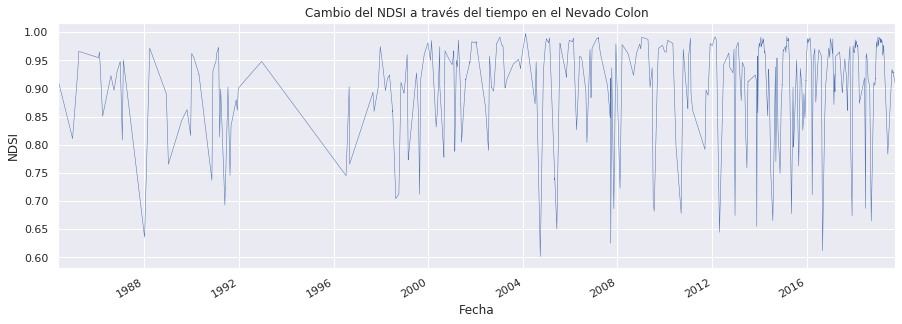

In [0]:
grafseries(dfcolon,0.6,"Colon")

In [0]:
dfcolon[dfcolon["NSDI"] > 0.6].describe()

,NSDI
count,438.000000
mean,0.911055
std,0.085524
min,0.601345
25%,0.888216
50%,0.938575
75%,0.974167
max,0.996705


### 3.3.2. Nevado Cocuy

Para el nevado del Cocuy, de la misma forma fue obtenida la gráfica de la variación temporal del contenido de nieve a partir del NDSI y las estadísticas descriptivas, sin embargo fueron filtrados los datos mayores a 0.6, puesto que existen valores inconsistentes que puede corresponder a nubosidad.

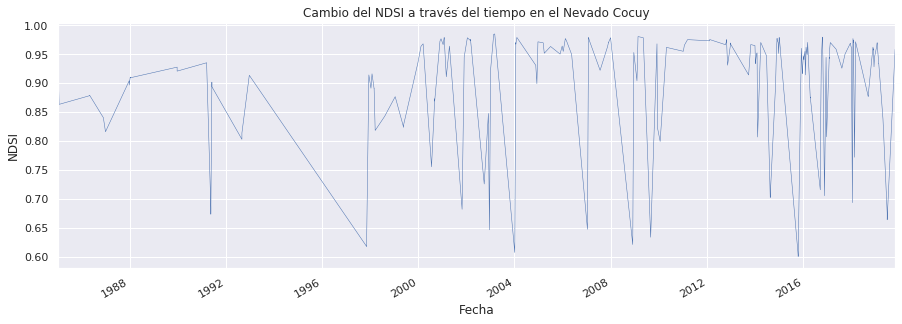

In [0]:
grafseries(dfcocuy,0.6,"Cocuy")

In [0]:
dfcocuy[dfcocuy["NSDI"] > 0.6].describe()

,NSDI
count,212.000000
mean,0.908374
std,0.093952
min,0.600192
25%,0.891061
50%,0.947251
75%,0.968948
max,0.985013


### 3.3.3. Nevado del Ruíz

Mientras que para el nevado del Ruíz, de la misma forma fue obtenida la gráfica de la variación temporal del contenido de nieve a partir del NDSI y las estadísticas descriptivas, sin embargo fueron filtrados los datos mayores a 0.4,puesto que habian datos inconsistentes que se sospecha que corresponden a nubes y aparentemente no posee tanto contenido de nieve como los nevados de Colón y el Cocuy.

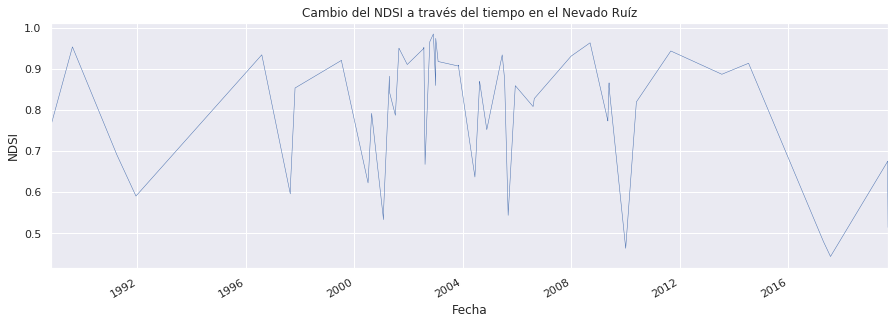

In [0]:
grafseries(dfruiz,0.4,"Ruíz")

In [0]:
dfruiz[dfruiz["NSDI"] > 0.4].describe()

,NSDI
count,59.000000
mean,0.798280
std,0.153209
min,0.443375
25%,0.674692
50%,0.855804
75%,0.920307
max,0.984619


## 3.4. Obtención de la Serie Temporal por GEE

Se empleo el flujo de trabajo mostrado en el laboratorio 6 de GEE para el análisis de datos temporales, se realizo la migración a *python*:

In [0]:
# Lista de las Variables independientes
independentes = ee.List(['constant', 't'])

# Nombre de la Variable Dependiente
dependentientes = ee.String('NDSI')
 
# Se obtiene la tendencia lineal. Contiene dos columnas correspondientes a los coeficientes y los residuales.
info_reg = mergel.getRegion(nevados,500).getInfo()
trend = mergel.select(independentes.add(dependentientes)).reduce(ee.Reducer.linearRegression(independentes.length(), 1))
coefficients = trend.select('coefficients').arrayProject([0]).arrayFlatten([independentes])
detrended = mergel.map(lambda image: image.select(dependentientes).subtract(image.select(independentes).multiply(coefficients).reduce('sum')).rename(dependentientes).copyProperties(image, [timeField]))


INFO:googleapiclient.discovery:URL being requested: POST https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/value:compute?prettyPrint=false&alt=json


In [0]:
trendt = nevados.map(mapfunc1)
listrend = trendt.toList(3).getInfo()
dfcolontr = getdf(listrend[0])
dfcocuytr = getdf(listrend[1])
dfruiztr = getdf(listrend[2])

INFO:googleapiclient.discovery:URL being requested: POST https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/value:compute?prettyPrint=false&alt=json


Como primera medida se obtiene la gráfica de cada serie temporal sin tendencia:

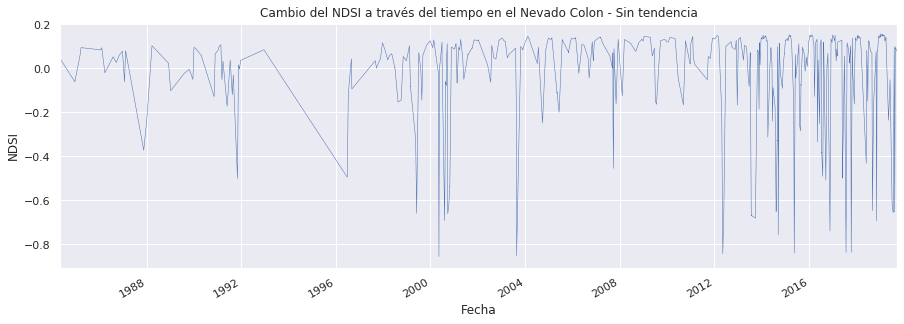

In [0]:
grafseries(dfcolontr, 0, "Colon - Sin tendencia")

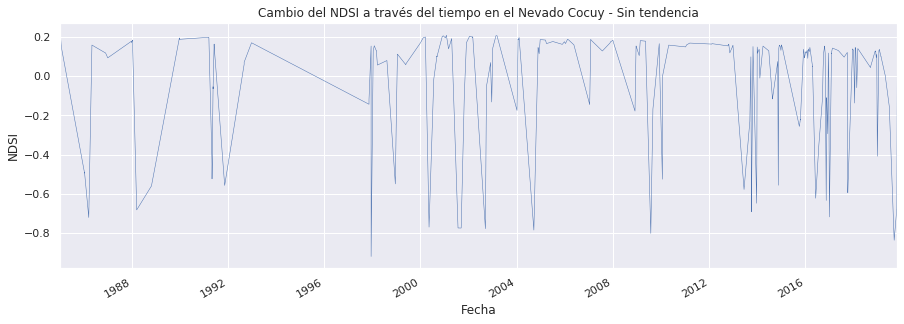

In [0]:
grafseries(dfcocuytr, 0, "Cocuy - Sin tendencia")

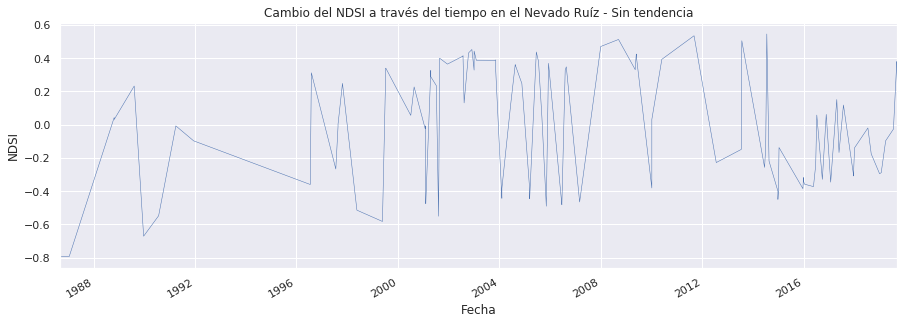

In [0]:
grafseries(dfruiztr, 0, "Ruíz - Sin tendencia")

Fue aplicada una serie armónica:

In [0]:
# Se define las variables para la regresión armónica.
harmonicIndependents = ee.List(['constant', 't', 'Cos', 'Sin'])

# Se agregan los terminos armonicos como nuevas bandas en la colección
harmonicl = mergel.map(getcossin)
harmonicTrend = mergel.select(harmonicIndependents.add(dependentientes)).reduce(ee.Reducer.linearRegression(harmonicIndependents.length(), 1))

# Se convierte la imagen de matriz en una imagen de coeficientes de varias bandas.
harmonicTrendCoefficients = harmonicTrend.select('coefficients').arrayProject([0]).arrayFlatten([harmonicIndependents])

# Cálculo de los valores ajustados.
fittedHarmonic = harmonicl.map(lambda image: image.addBands(image.select(harmonicIndependents).multiply(harmonicTrendCoefficients).reduce('sum').rename('fitted')))


La ejecución desde este notebook fue exitosa, pero no permite la visualización del resultado para cada nevado. Lo anterior se debe a que estas funciones no están bien implementadas en *python* y el error fue asociada a que no reconoce la banda *cos* de una imagen particular, por eso se decide realizar el proceso desde el code editor de GEE para obtener los siguientes resultados para cada nevado:

### 3.4.1. Nevado Colon

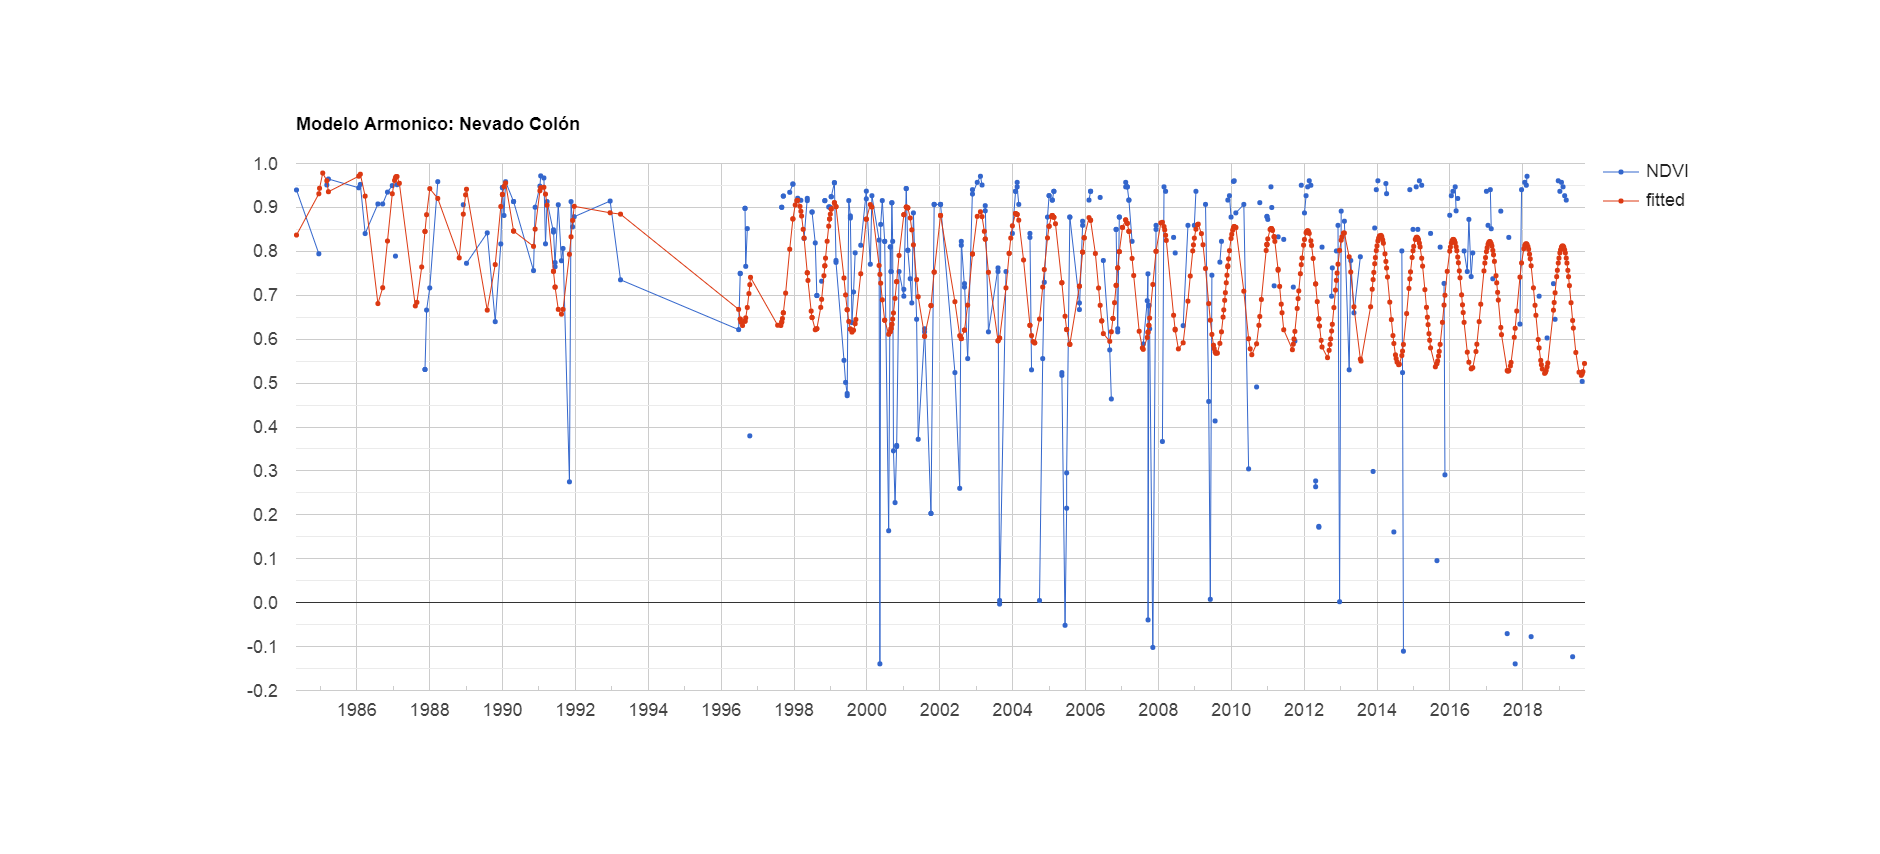

In [0]:
Image('Colon.png', width= 900)

### 3.4.2. Nevado Cocuy

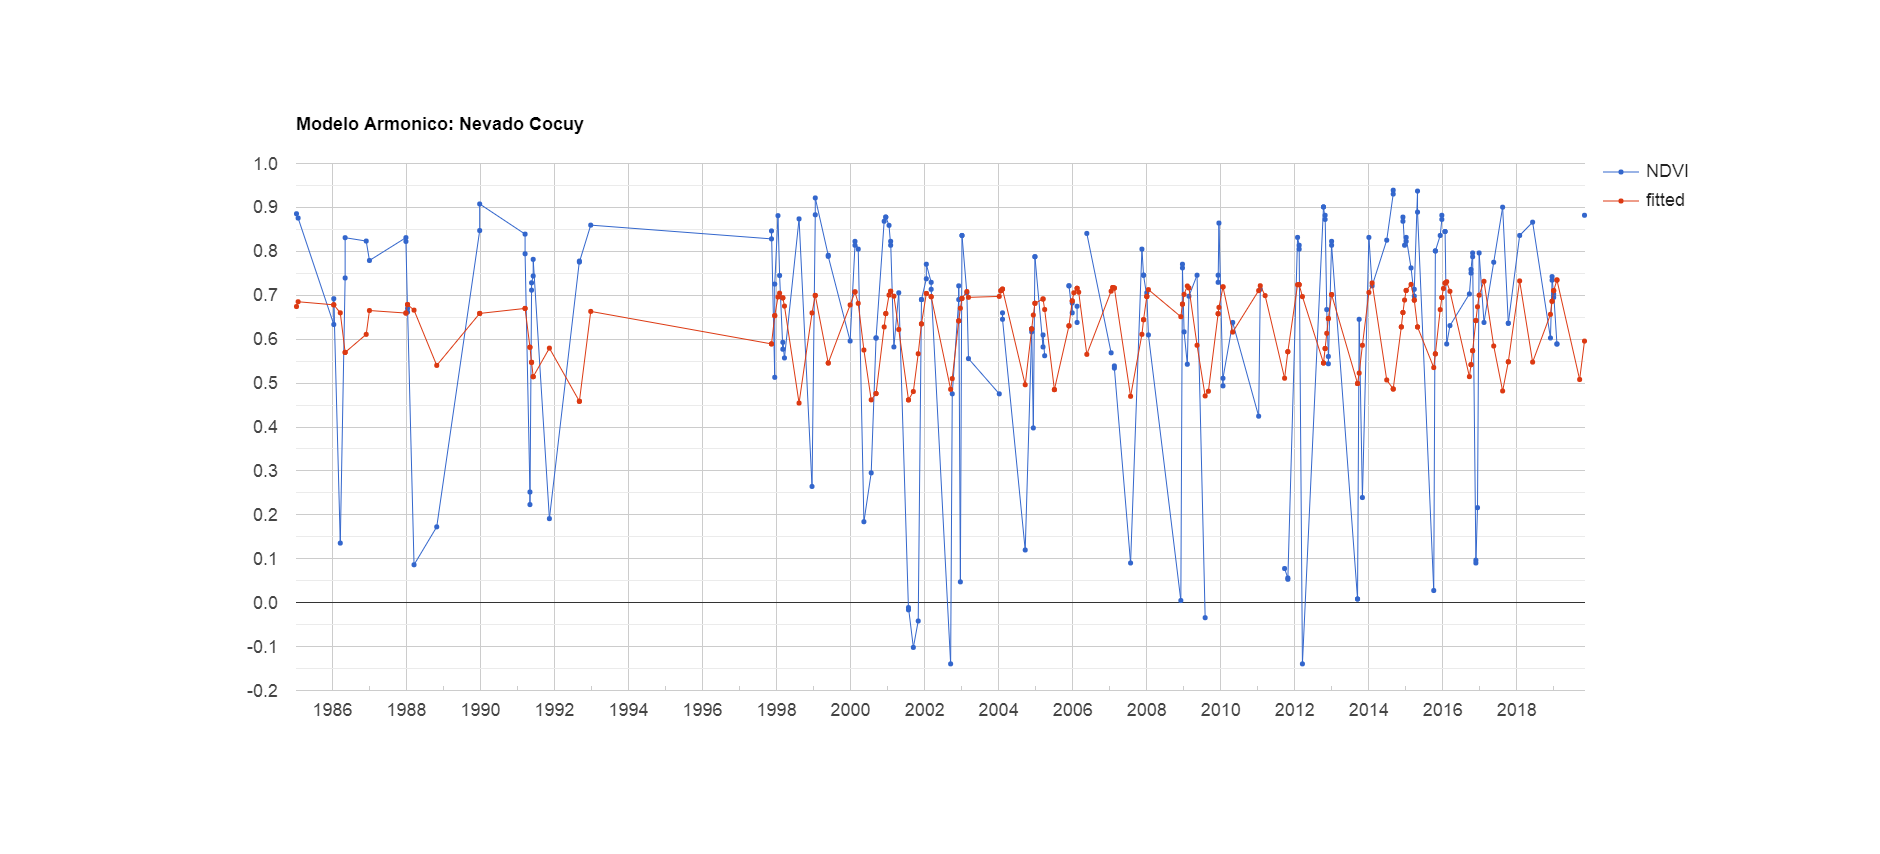

In [0]:
Image('Cocuy.png', width= 900)

### 3.4.3. Nevado del Ruíz

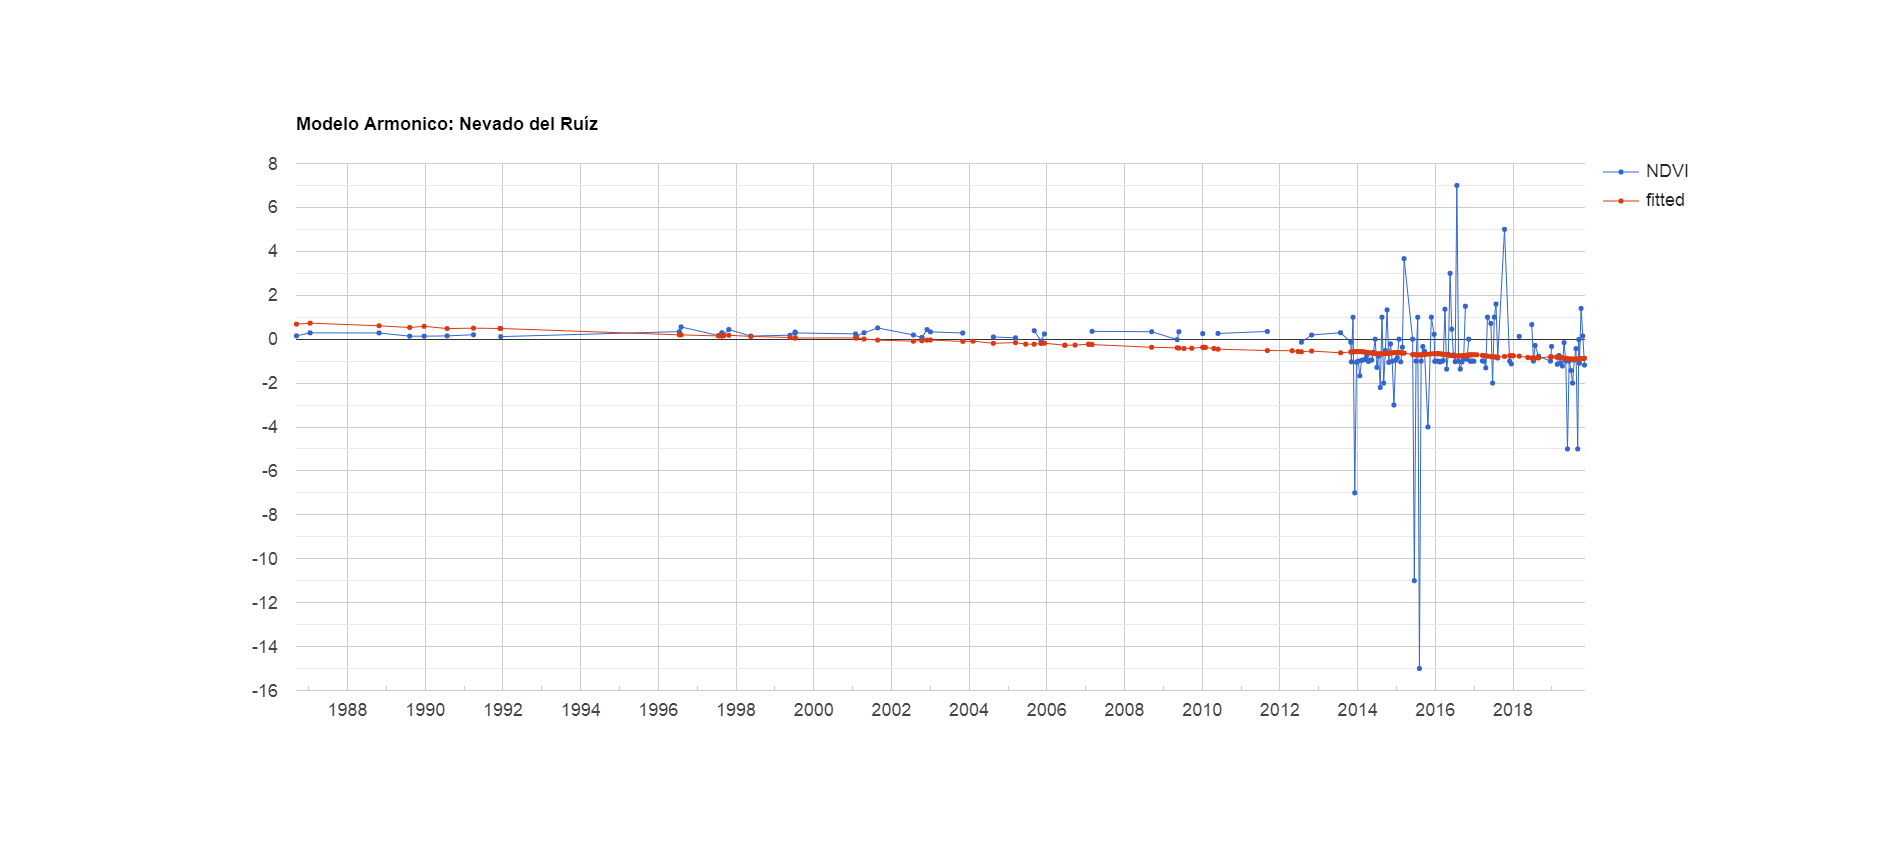

In [0]:
Image('Ruiz.png', width= 900)

## 3.5. Obtención de la Serie Temporal por Prophet

### 3.5.1. Nevado Colon

Para el nevado se estimó predicciones de NDSI para septiembre de 2020 junto a la gráfica de su distribución y descomposición de tendencia temporal por escala.


In [0]:
gm = dfcolon.rename(columns={ 'NSDI': 'y'})
gm.reset_index(level=0, inplace=True)
gm = gm.rename(columns={ 'Date': 'ds'})
  
m = Prophet()
m.fit(gm)
  
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
845,2020-09-23 15:11:05,0.680517,0.441744,0.871864
846,2020-09-24 15:11:05,0.718539,0.503223,0.928092
847,2020-09-25 15:11:05,0.694502,0.470256,0.908434
848,2020-09-26 15:11:05,0.737643,0.511735,0.938138
849,2020-09-27 15:11:05,0.684065,0.476269,0.887568


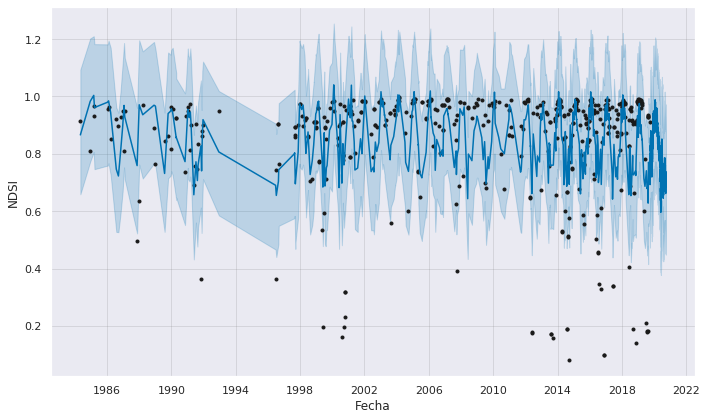

In [0]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig1 = m.plot(forecast, ylabel="NDSI", xlabel="Fecha" )

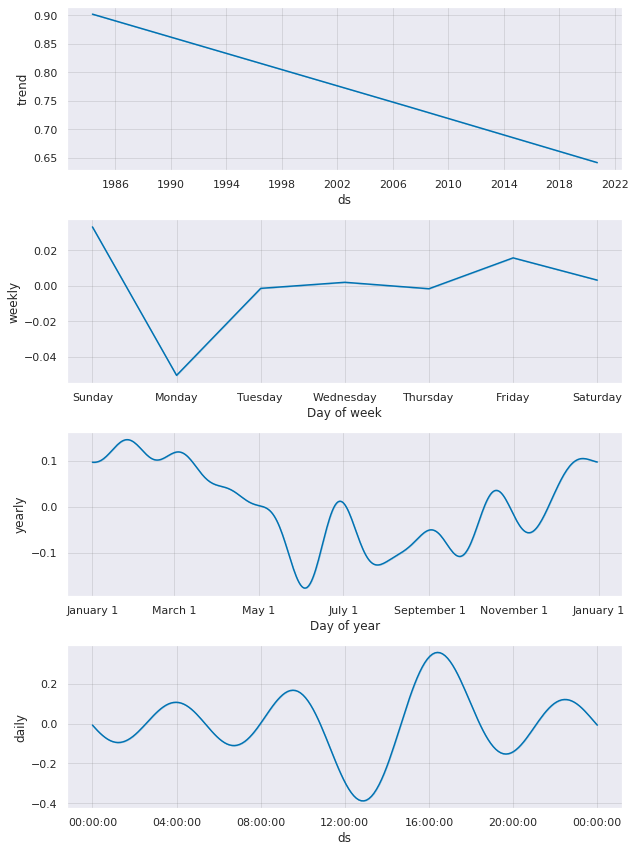

In [0]:
fig2 = m.plot_components(forecast)

### 3.5.2. Nevado Cocuy

Para el nevado se estimó predicciones de NDSI para octubre de 2020 junto a la gráfica de su distribución y descomposición de tendencia temporal por escala

In [0]:
gm = dfcocuy.rename(columns={ 'NSDI': 'y'})
gm.reset_index(level=0, inplace=True)
gm = gm.rename(columns={ 'Date': 'ds'})
  
m = Prophet()
m.fit(gm)
  
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
604,2020-10-26 14:50:03,0.704666,0.437908,0.970897
605,2020-10-27 14:50:03,0.678699,0.422216,0.957530
606,2020-10-28 14:50:03,0.741664,0.501718,1.019945
607,2020-10-29 14:50:03,0.861963,0.592754,1.127046
608,2020-10-30 14:50:03,0.798360,0.519215,1.043290


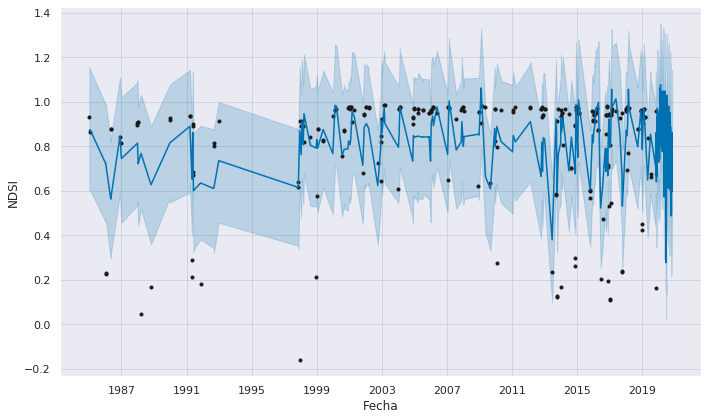

In [0]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig1 = m.plot(forecast, ylabel="NDSI", xlabel="Fecha" )

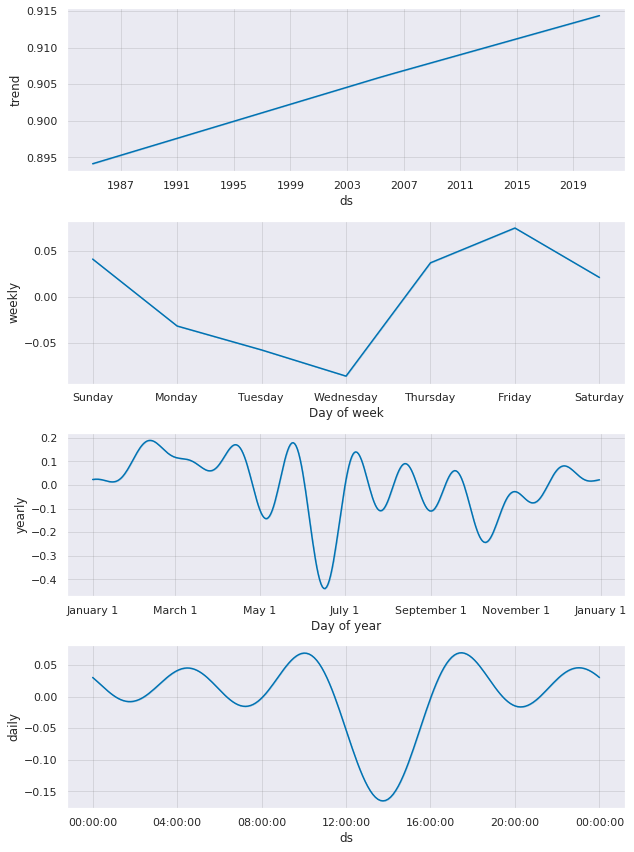

In [0]:
fig2 = m.plot_components(forecast)

### 3.5.3. Nevado del Ruíz

Para el nevado se estimó predicciones de NDSI para septiembre de 2020 junto a la gráfica de su distribución y descomposición de tendencia temporal por escala.

In [0]:
gm = dfruiz.rename(columns={ 'NSDI': 'y'})
gm.reset_index(level=0, inplace=True)
gm = gm.rename(columns={ 'Date': 'ds'})
  
m = Prophet(
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
463,2020-09-06 15:04:57,0.407894,0.089501,0.740023
464,2020-09-07 15:04:57,0.448352,0.120640,0.764316
465,2020-09-08 15:04:57,0.376465,0.063007,0.727030
466,2020-09-09 15:04:57,0.175071,-0.134554,0.513479
467,2020-09-10 15:04:57,0.456004,0.140801,0.764316


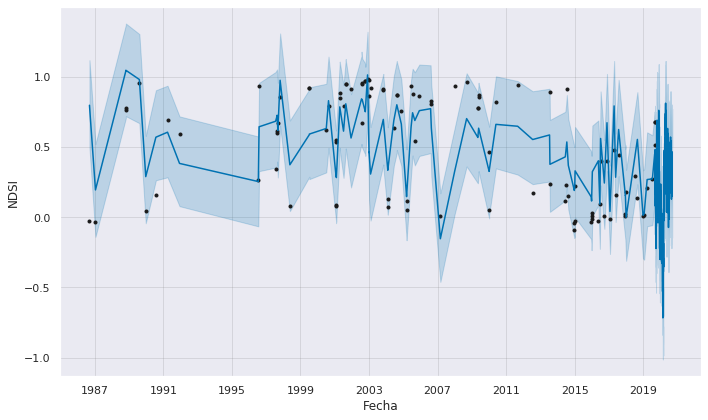

In [0]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)
fig1 = m.plot(forecast, ylabel="NDSI", xlabel="Fecha" )

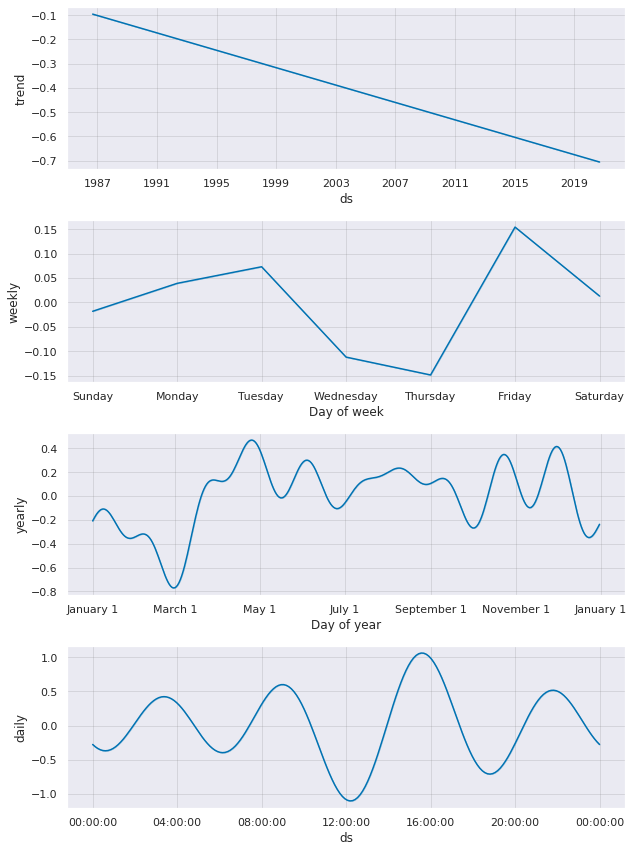

In [0]:
fig2 = m.plot_components(forecast)

## 3.6 Visualización de la mediana temporal del NDSI

Por último se visualizó el valor mediano temporal del NDSI por toda la imagen con el proposito de observar el comportamiento dentro de los nevados de interés.


In [6]:
m = folium.Map(location=[4, -74], zoom_start=6, height=500)
m.add_ee_layer(mergel.select('NDSI').median() , visSnow, 'Median temporal NDSI')
m.add_child(folium.LayerControl())
tooltip = 'Información aqui!'
folium.Marker([10.842581182426391, -73.71068408862976 ], popup='<i>Pico Cristobal Colon</i>', tooltip=tooltip).add_to(m)
folium.Marker([6.458040063083138, -72.28583304688681 ], popup='<i>Nevado El Cocuy</i>', tooltip=tooltip).add_to(m)
folium.Marker([4.894131887593361, -75.32295673697962], popup='<i>Nevado del Ruíz</i>', tooltip=tooltip).add_to(m)
display(m)


INFO:googleapiclient.discovery:URL being requested: POST https://earthengine.googleapis.com/v1alpha/projects/earthengine-legacy/maps?fields=name&alt=json


# 4. Discusión

Es claro que el nevado que posee menor cantidad de nieve corresponde al del Ruíz (a pesar de que las estadísticas descriptivas fueron realizadas filtrando los valores de NDSI) puesto que la mediana temporal es cercana a 0.85 mientras que los otros nevados se acercan a 0.94. Por otro lado los valores de NDSI del nevado del ruíz poseen una variabilidad muy alta, por lo que se puede asociar esto a que es una zona que historicamente ha sido dificultosa su toma por la presencia constante de nubes y eso explica el número de datos tan bajo que posee en comparación con los otros nevados. Además según el estudio del IDEAM publicado en el 2017 desde el año 2010 el nevado posee actividad volcanica lo que ha desacelerado el derretimiendo del glaciar, es decir que debe mostrar baja para el 2010 a 2019, sin embargo los resultados obtenidos muestran lo contrario, esto puede estar asociado a que la metodología del IDEAM evalua es el área del glaciar mientras que el mostrado da una estimación de la cantidad de nieve a través del NDSI.

Por otro lado es notorio en todas las gráficas la existencia de pocos datos en el periodo comprendido de 1992 a 1998, se asocia a que no todas las imágenes *Landsat 4* y *Landsat 5* se encuentran disponibles en el nivel de procesamiento *Surface Reflentance Tier 1*. No obstante, los resultados de las series temporales, muestran que a pesar de la ausencia de estos datos temporales, se pudo estimar sin problema la tendencia temporal y realizar un análisis robusto del comportamiento de cada nevado.

En relación a los resultados para cada nevado se observa que los dos métodos para estimar la serie temporal son consistentes. Debido a que el nevado Colon esta desacelerando su contenido, pero el de Cocuy se encuentra estable y aparantemente creciendo, viendose esto con más claridad gracias a las gráficas de *fbprophet*. El comportamiento de los dos nevados es consistente con el reporte del IDEAM del estado de los nevados, puesto que según este documento estos dos glaciares estan perdiendo contenido nieve, pero no a un ritmo alto, siendo el más lento el de Cocuy. Mientras que el nevado de de Ruíz se encuentra en caida libre el contenido de nieve llegando a una predicción cercana a 0.42 para el siguiente año, sin embargo como se menciono previamente según el reporte del IDEAM el ritmo debería ser menos acelerado al mostrado en este informe.

Referente a las gráficas de comportamiento temporal tiene sentido tomar en cuenta la que muestra el comportamiento general junto a la anual. Es evidente que en relación a las gráficas anuales, están asociadas a las dinámicas meteorológicas de cada región, sin embargo se observa que el mes de Junio presenta una baja significativa y esto esta asociado a que corresponde a temporada seca a las zonas montañosas de Colombia. Esto no fue posible compararlo con el informe del IDEAM, debido a que no muestra un análisis detallado de forma temporal.


# 5. Conclusiones

Se demostro que para realizar el monitoreo de la cantidad de nieve en los glaciares que posee Colombia es un proceso que se puede realizar con facilidad utilizando la infraestructura que posee *Google Earth Engine* en relación al fácil uso y procesamiento de la colección de imágenes junto a sus métodos robustos para el análisis temporal. Sin embargo, su implementación en *python* aún se encuentra en desarrollo y se debe realizar esfuerzos para su implementación en sistemas de monitoreo oficiales, para la toma de decisiones acertadas.

Los nevados en Colombia están perdiendo progresivamente su cantidad de nieve que de acuerdo a los entes que estudian este fenomeno, se encuentra asociado al cambio climático y a las dinámicas propias de la región en la que se encuentran (como la reactivación de la actividad volcánica). Por consiguiente es necesario que las entidades estatales competentes tomen medidas para que la tendencia mostrada en este ejercicio tome un rumbo que favorezca la conservación de los nevados.

# Referencias

Berman, E. E., Bolton, D. K., Coops, N. C., Mityok, Z. K., Stenhouse, G. B., & Moore, R. D. (Dan. (2018). Daily estimates of Landsat fractional snow cover driven by MODIS and dynamic time-warping. Remote Sensing of Environment, 216(August), 635–646. https://doi.org/10.1016/j.rse.2018.07.029

Friedl, P., Weiser, F., Fluhrer, A., & Braun, M. H. (2019). Remote sensing of glacier and ice sheet grounding lines: A review. Earth-Science Reviews, 102948. https://doi.org/10.1016/j.earscirev.2019.102948

Hansen, M. C., & Loveland, T. R. (2012). A review of large area monitoring of land cover change using Landsat data. Remote Sensing of Environment, 122, 66–74. https://doi.org/10.1016/j.rse.2011.08.024

Satir, O. (2016). Comparing the satellite image transformation techniques for detecting and monitoring the continuous snow cover and glacier in Cilo mountain chain Turkey. Ecological Indicators, 69, 261–268. https://doi.org/10.1016/j.ecolind.2016.04.032

Svendsen, D. H., Martino, L., & Camps-valls, G. (2019). Active Emulation of Computer Codes with Gaussian Processes – Application to Remote Sensing. Pattern Recognition, 107103. https://doi.org/10.1016/j.patcog.2019.107103


